<a href="https://colab.research.google.com/github/EstherMamai/EDAprac/blob/main/EDA_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Analyzing the data**

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**description of data**

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**checking columns**

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

check for missing values

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

**Univariate Analysis**

count plot of quality

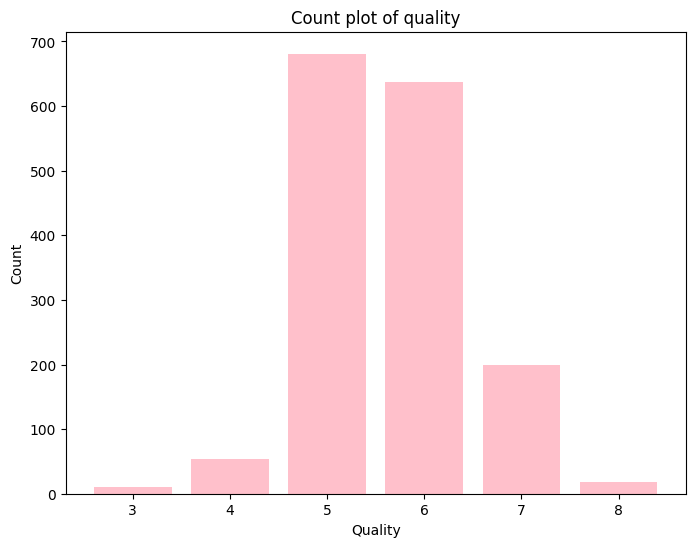

In [10]:
quality_counts=df['quality'].value_counts()

#count plot
plt.figure(figsize=(8,6))
plt.bar(quality_counts.index,quality_counts,color='pink')
plt.title('Count plot of quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

kernel plots

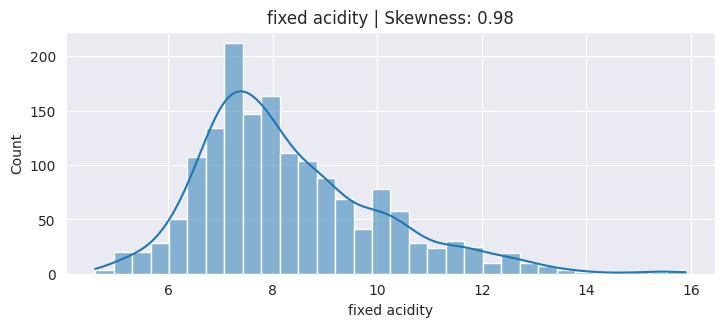

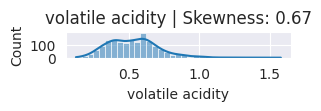

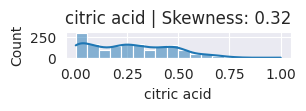

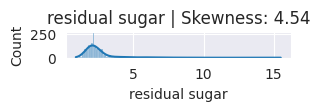

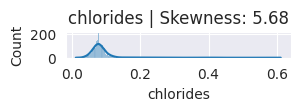

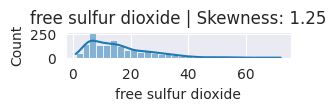

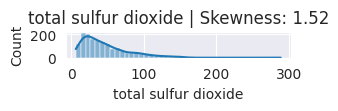

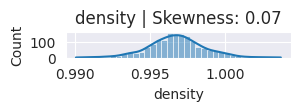

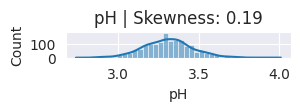

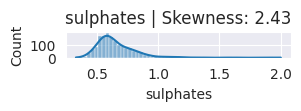

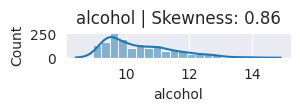

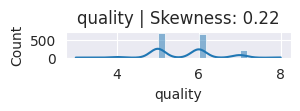

In [11]:
#set seaborn style
sns.set_style('darkgrid')

#identify numerical columns
numerical_columns=df.select_dtypes(include=["int64","float64"]).columns

#plot distribution for each numerical feature
plt.figure(figsize=(14,len(numerical_columns)*3))
for idx, feature in enumerate(numerical_columns,1):
  plt.subplot(len(numerical_columns),2,idx)
  sns.histplot(df[feature],kde=True)
  plt.title(f"{feature} | Skewness: {round(df[feature].skew(),2)}")

  #adjust layout and show plots
  plt.tight_layout()
  plt.show()

swarm plot

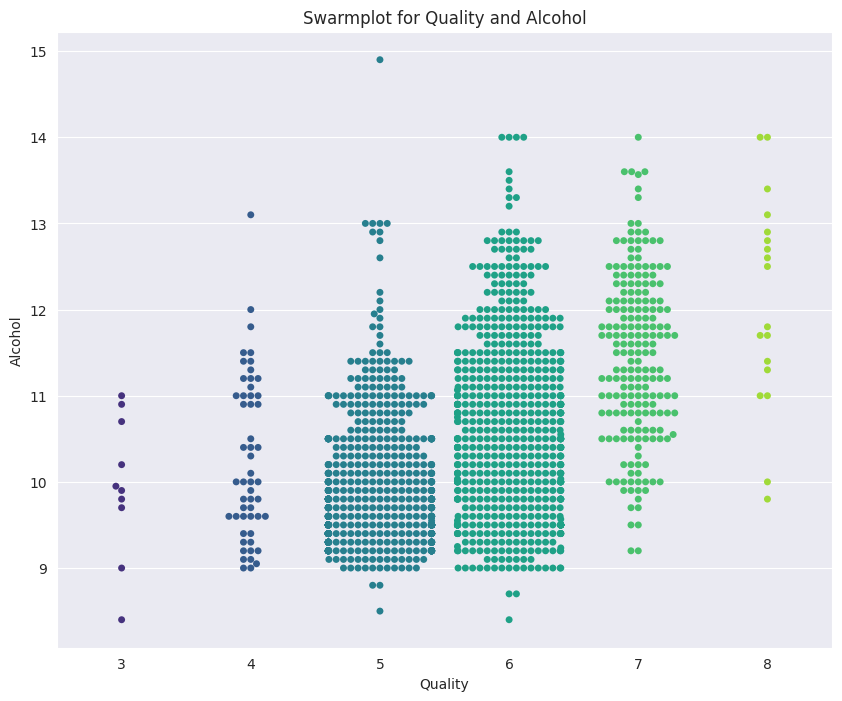

In [12]:
plt.figure(figsize=(10,8))

#plot using sns
sns.swarmplot(x="quality",y="alcohol",data=df,palette='viridis')

plt.title('Swarmplot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

**Bivariate Analysis**

pair plot

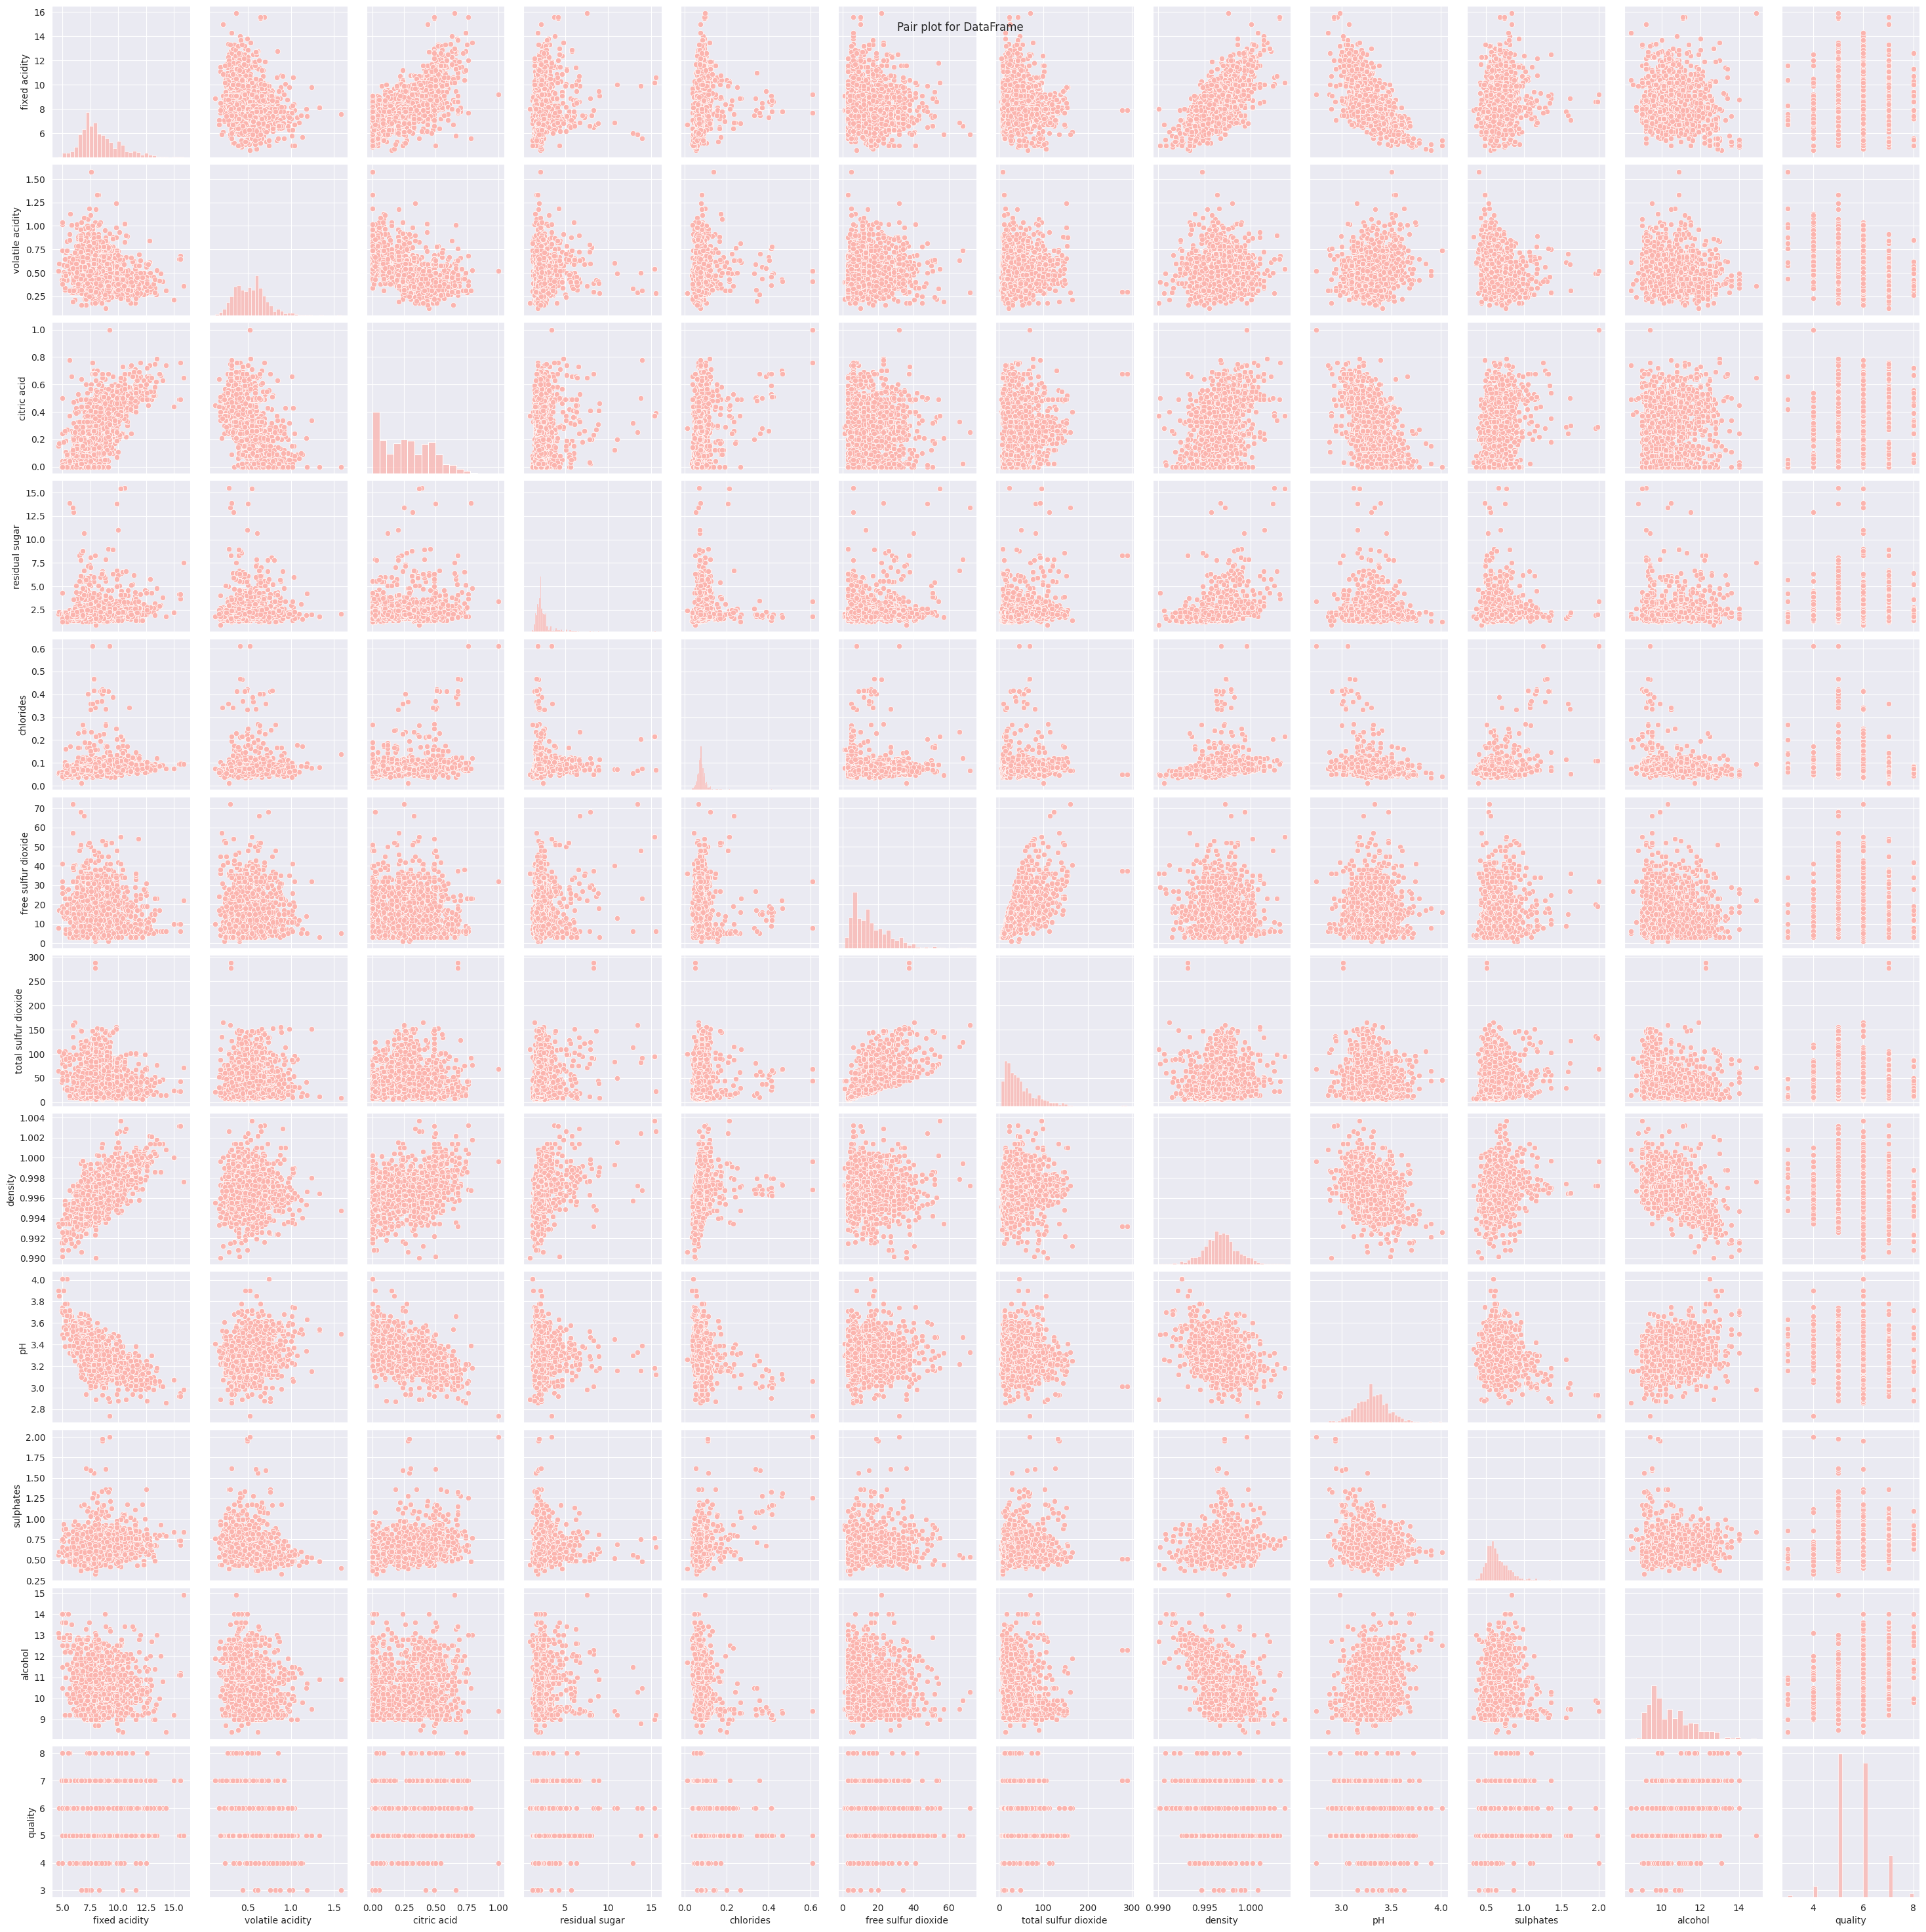

In [13]:
#set the color palette
sns.set_palette('Pastel1')

plt.figsize=(10,6)
sns.pairplot(df)

plt.suptitle('Pair plot for DataFrame')
plt.show()

violin plot

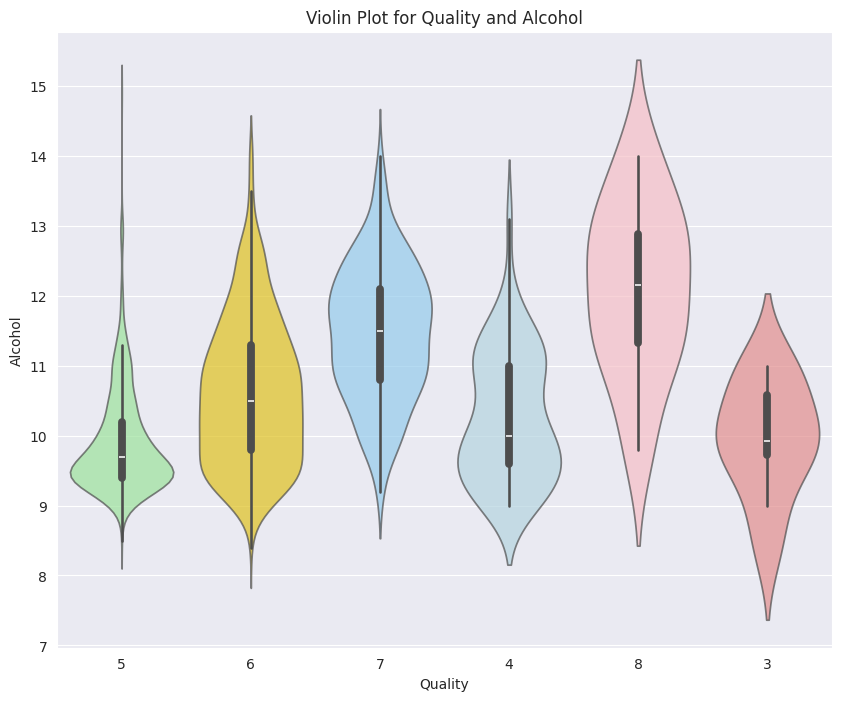

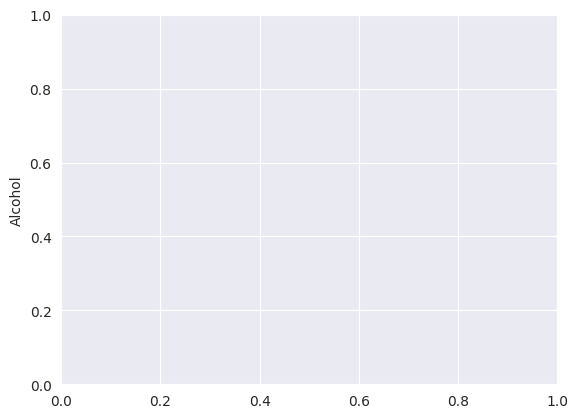

In [14]:
df['quality']=df['quality'].astype(str)

plt.figure(figsize=(10,8))

#using seaborn to create violin plot
sns.violinplot(x='quality',y='alcohol', data=df, palette={'3': 'lightcoral', '4': 'lightblue', '5': 'lightgreen', '6': 'gold', '7': 'lightskyblue', '8': 'lightpink'}, alpha=0.7)
plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()
plt.show()
plt.ylabel('Alcohol')
plt.show()


box plot

<Axes: xlabel='quality', ylabel='alcohol'>

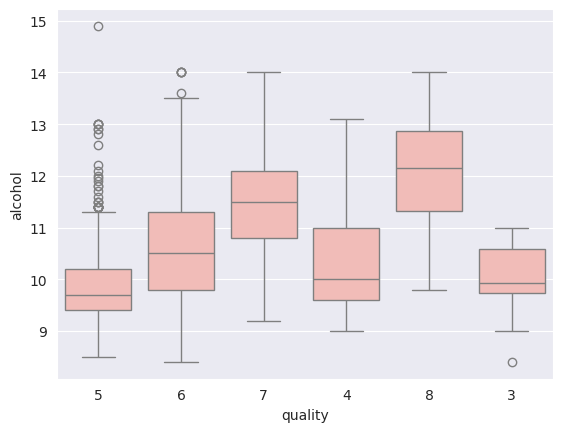

In [15]:
sns.boxplot(x='quality', y='alcohol', data=df)


**Multivariate Analysis**

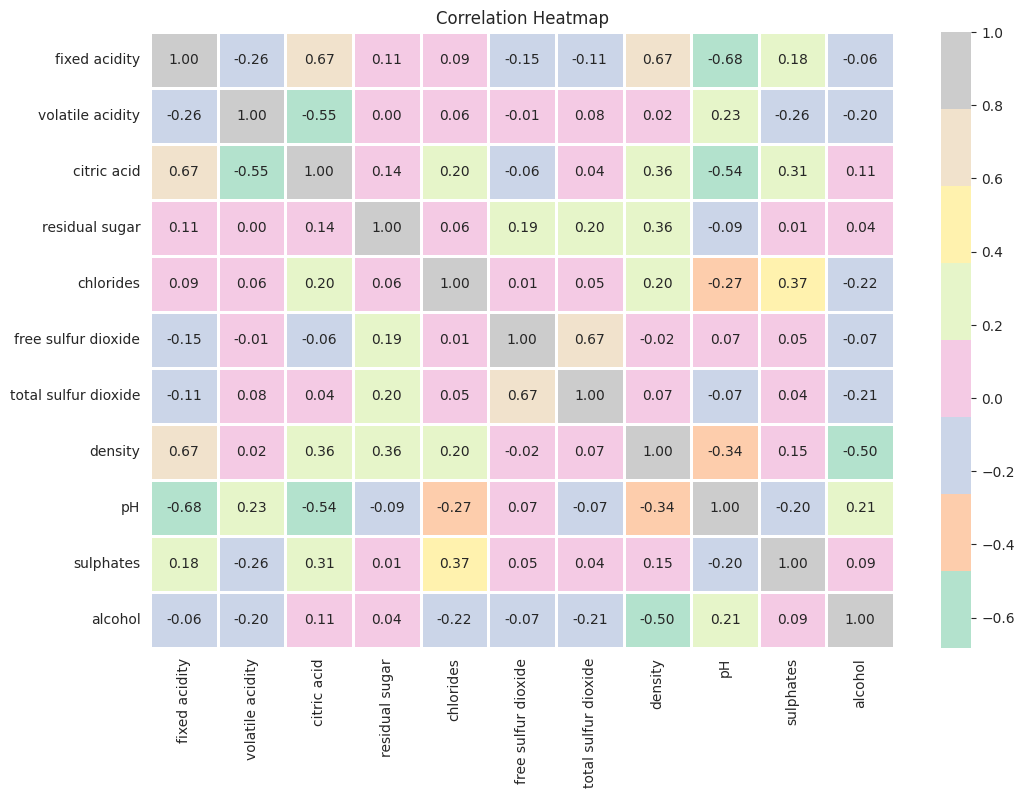

In [17]:
plt.figure(figsize=(12,8))

#heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()